## Import

In [1]:
#import functions
import sys

# Add the directory containing your file to Python's search path
sys.path.append(r'C:\Users\rishi\OneDrive - Monash University\Documents\Monash\Sonorus\sonorus all')

# Now you can import the function from the file
from Resnet import *
from Model_evaluation import *

In [2]:
#import libraries
import tensorflow as tf
import numpy as np

In [3]:
#Load data
X_train = np.load(r'C:\Users\rishi\OneDrive - Monash University\Documents\Monash\Sonorus\Sonorus - nuie + physionet\data\nuie_physionet_specs_train.npy')
X_test = np.load(r'C:\Users\rishi\OneDrive - Monash University\Documents\Monash\Sonorus\Sonorus - nuie + physionet\data\nuie_physionet_specs_test.npy')
y_train = np.load(r'C:\Users\rishi\OneDrive - Monash University\Documents\Monash\Sonorus\Sonorus - nuie + physionet\data\nuie_physionet_outcomes_train.npy')
y_test = np.load(r'C:\Users\rishi\OneDrive - Monash University\Documents\Monash\Sonorus\Sonorus - nuie + physionet\data\nuie_physionet_outcomes_test.npy')

## Prepare data

In [4]:
#Prepare data
#expand dims
X_train = np.expand_dims(X_train, axis=3)
X_test = np.expand_dims(X_test, axis=3)
#data type change
#X_train = X_train.astype('float32')
#X_test = X_test.astype('float32')
#create one hot encoding
y_train = outcome_reshape(y_train)
y_test = outcome_reshape(y_test)
#expand dims
y_train = np.array(y_train)
y_test = np.array(y_test)
y_train = np.expand_dims(y_train, axis=1)
y_test = np.expand_dims(y_test, axis=1)

## Resnet 34

In [6]:
model = ResNet()
model.compile(optimizer = 'adam', loss='sparse_categorical_crossentropy', metrics = ['accuracy'])
#model.summary()

In [7]:
# Fit the model to your training data
model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test))

Epoch 1/10
590/590 ━━━━━━━━━━━━━━━━━━━━ 1947s 3s/step - accuracy: 0.6115 - loss: 1.4224 - val_accuracy: 0.6386 - val_loss: 0.6931
Epoch 2/10
590/590 ━━━━━━━━━━━━━━━━━━━━ 2056s 3s/step - accuracy: 0.6388 - loss: 0.6132 - val_accuracy: 0.6316 - val_loss: 0.6084
Epoch 3/10
590/590 ━━━━━━━━━━━━━━━━━━━━ 1906s 3s/step - accuracy: 0.6444 - loss: 0.6073 - val_accuracy: 0.6535 - val_loss: 0.6832
Epoch 4/10
590/590 ━━━━━━━━━━━━━━━━━━━━ 1945s 3s/step - accuracy: 0.6507 - loss: 0.6029 - val_accuracy: 0.3707 - val_loss: 0.7818
Epoch 5/10
590/590 ━━━━━━━━━━━━━━━━━━━━ 1887s 3s/step - accuracy: 0.6528 - loss: 0.6049 - val_accuracy: 0.6704 - val_loss: 0.6632
Epoch 6/10
590/590 ━━━━━━━━━━━━━━━━━━━━ 1623s 3s/step - accuracy: 0.6597 - loss: 0.6051 - val_accuracy: 0.6340 - val_loss: 0.6294
Epoch 7/10
590/590 ━━━━━━━━━━━━━━━━━━━━ 1627s 3s/step - accuracy: 0.6604 - loss: 0.6021 - val_accuracy: 0.3699 - val_loss: 0.8670
Epoch 8/10
590/590 ━━━━━━━━━━━━━━━━━━━━ 1623s 3s/step - accuracy: 0.6632 - loss: 0.6011 - 

Model Evaluation:
590/590 ━━━━━━━━━━━━━━━━━━━━ 342s 576ms/step
Train set:
Train Accuracy: 0.6221386180584993 | Sensitivity: 0.9995742869306088 | Specificity: 0.00014031149151115475


148/148 ━━━━━━━━━━━━━━━━━━━━ 83s 562ms/step
Test set:
Accuracy:  0.6288681644764731 | Sensitivity: 0.9993263725159987 | Specificity: 0.0


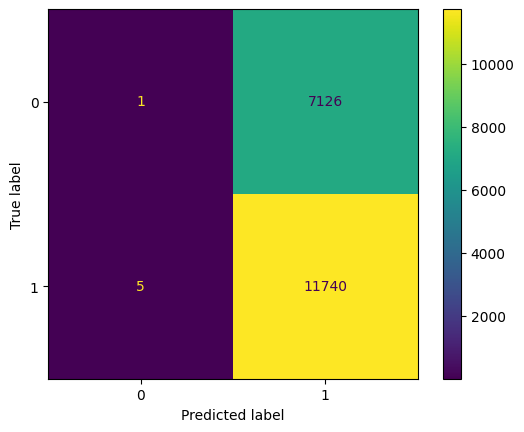

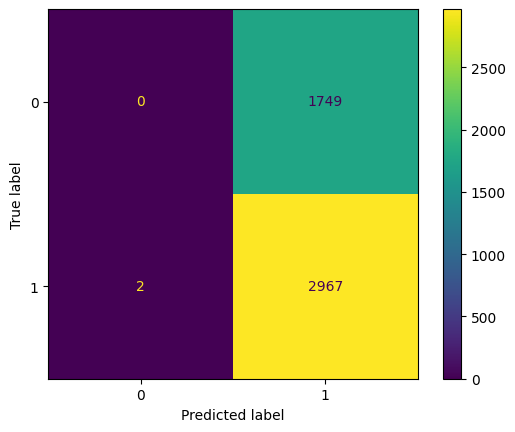

In [8]:
model_evaluation(model, X_train, X_test, y_train, y_test)

In [39]:
model_evaluation(model, X_train, X_test, y_train, y_test, reshape_outcome = False)

TypeError: model_evaluation() got an unexpected keyword argument 'reshape_outcome'

In [30]:
sum(y_test == 0), sum(y_test == 1)

(array([1749]), array([2969]))

In [31]:
sum(y_train == 0), sum(y_train == 1)

(array([11745]), array([7127]))

In [33]:
sum(y_train)

array([7127])

## Resnet 34 - 5 epoch

In [5]:
model = ResNet()
model.compile(optimizer = 'adam', loss='sparse_categorical_crossentropy', metrics = ['accuracy'])
#model.summary()

In [6]:
# Fit the model to your training data
model.fit(X_train, y_train, epochs=5, validation_data=(X_test, y_test))

Epoch 1/5
590/590 ━━━━━━━━━━━━━━━━━━━━ 1769s 3s/step - accuracy: 0.6222 - loss: 1.2731 - val_accuracy: 0.3701 - val_loss: 0.6998
Epoch 2/5
590/590 ━━━━━━━━━━━━━━━━━━━━ 1845s 3s/step - accuracy: 0.6412 - loss: 0.6123 - val_accuracy: 0.6558 - val_loss: 0.6122
Epoch 3/5
590/590 ━━━━━━━━━━━━━━━━━━━━ 7115s 12s/step - accuracy: 0.6469 - loss: 0.6043 - val_accuracy: 0.6501 - val_loss: 0.8063
Epoch 4/5
590/590 ━━━━━━━━━━━━━━━━━━━━ 6856s 12s/step - accuracy: 0.6463 - loss: 0.6110 - val_accuracy: 0.3673 - val_loss: 0.7250
Epoch 5/5
590/590 ━━━━━━━━━━━━━━━━━━━━ 7419s 13s/step - accuracy: 0.6567 - loss: 0.6038 - val_accuracy: 0.6200 - val_loss: 0.6791


In [10]:
model_evaluation(model, X_train, X_test, y_train, y_test)

Model Evaluation:


590/590 ━━━━━━━━━━━━━━━━━━━━ 866s 1s/step


ValueError: Classification metrics can't handle a mix of binary and multilabel-indicator targets

In [9]:
import tensorflow as tf
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

def model_evaluation(model, X_train, X_test, y_train, y_test, threshold = 0.5, evaluate = False, reshape_outcome = False):
    print("Model Evaluation:")
    pred_proba_train = model.predict(X_train)
    pred_train = tf.greater(pred_proba_train, threshold)
    pred_train = outcome_reshape(pred_train)
    if reshape_outcome == True:
        y_train = outcome_reshape(y_train)
    tn, fp, fn, tp = confusion_matrix(y_train, pred_train, labels = [0,1]).ravel()
    
    if evaluate == True:
        score = model.evaluate(X_train, y_train, verbose=0)
        print("Train set:")
        print('Train loss:', score[0])
        print('Train accuracy:', score[1])
        print("Sensitivity:", tp/(tp+fn), "| Specificity:", tn/(tn+fp))
        ConfusionMatrixDisplay.from_predictions(y_train, pred_train)
    else:
        print("Train set:")
        print("Train Accuracy:", (tp+tn)/(tp+tn+fp+fn), "| Sensitivity:", tp/(tp+fn), "| Specificity:", tn/(tn+fp))
        ConfusionMatrixDisplay.from_predictions(y_train, pred_train)
    print("\n")

    

    pred_proba_test = model.predict(X_test)
    pred_test = tf.greater(pred_proba_test, threshold)
    pred_test = outcome_reshape(pred_test)
    if reshape_outcome == True:
        y_test = outcome_reshape(y_test)
    tn, fp, fn, tp = confusion_matrix(y_test, pred_test, labels = [0,1]).ravel()
    if evaluate == True:
        print("Test set:")
        score = model.evaluate(X_test, y_test, verbose=0)
        print('Test loss:', score[0])
        print('Test accuracy:', score[1])
        print("Sensitivity:", tp/(tp+fn), "| Specificity:", tn/(tn+fp))
        ConfusionMatrixDisplay.from_predictions(y_test, pred_test)
    else:
        print("Test set:")
        #print("tn:", tn, "fp:", fp, "fn:", fn, "tp:", tp )
        print("Accuracy: ", (tp+tn)/(tp+tn+fp+fn), "| Sensitivity:", tp/(tp+fn), "| Specificity:", tn/(tn+fp))
        ConfusionMatrixDisplay.from_predictions(y_test, pred_test)
        

def outcome_reshape(input):
    out = []
    for i in range(len(input)):
        if input[i][0] == True: #normal is true
            out.append(0) #0
        else:
            out.append(1)
    return out